In [4]:
import matplotlib.pyplot as plt

In [8]:
# constants

rho = 3400 
g = 3
alpha = 5e-5
d = 1000e3
k = 3
kappa = 7e-7
eta = 1e20
L = 600e3
Nu_max = 1.65

# boundary conditions
Tsurf = 250

In [6]:
def temperature_scale(H, d, k):
    return H * d ** 2 / k

def RaH(rho, g, alpha, dTH, d, kappa, eta):
    return rho * g * alpha * dTH * d ** 3 / (kappa * eta)

def f_avg(zp, c=0.05, d=1.55):
    # nondimensional "ambient" T profile
    return c / zp ** d

def delta_tbl_avg(RaH):
    # nondimensional bdy layer thickness
    if RaH < 1e5:
        return 0.8241 * RaH ** -0.06637
    elif RaH < 1e7:
        return 4.4412 * RaH ** -0.2203
    elif RaH < 1e9:
        return 5.6995 * RaH ** -0.2352
    else:
        raise Exception('RaH out of bounds')

def mixing_length_avg(zp, RaH):
    # nondimensional mixing length
    delta_tbl = delta_tbl_avg(RaH)
    
    b = 1 - delta_tbl  # z* at max value
    a = ( 18 * b / (RaH * f_avg(b) ** 2) ) ** (1/4)  # max value of l*
    
    if zp < b:
        return a/b * zp  # distance from upper boundary
    else:
        return -a / (1 - b) * zp + a + (a * b) / (1 - b)  # distance from lower boundary
        

def f_hot(zp, c=0.055, d=1.52):
    # nondimensional "ambient" T profile
    return c / zp ** d

def delta_tbl_hot(RaH):
    # nondimensional bdy layer thickness
    if RaH < 1e5:
        return 1.7881 * RaH ** -0.1558
    elif RaH < 1e7:
        return 4.3793 * RaH ** -0.234
    elif RaH < 1e9:
        return 4.6238 * RaH ** -0.2361
    else:
        raise Exception('RaH out of bounds')

def mixing_length_hot(zp, RaH):
    # nondimensional mixing length
    delta_tbl = delta_tbl_hot(RaH)
    
    b = 1 - delta_tbl  # z* at max value
    a = ( 18 * b / (RaH * f_hot(b) ** 2) ) ** (1/4)  # max value of l*
    
    if zp < b:
        return a/b * zp  # distance from upper boundary
    else:
        return -a / (1 - b) * zp + a + (a * b) / (1 - b)  # distance from lower boundary



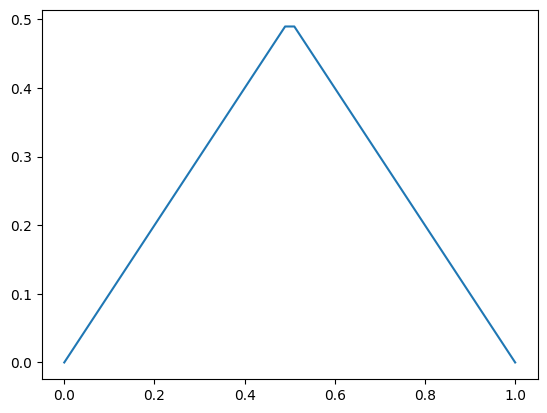

In [7]:
zmin, zmax = 0, 1
import numpy as np
zv = np.linspace(zmin, zmax)
plt.plot((zv - zmin)/(zmax-zmin), [mixing_length_avg(zi) for zi in zv])